In [41]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

df_combo = pd.read_csv('../data/combo.csv')
df_combo.head()

,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,TOTAL,Total_Pop,Incidence Per Age Capita,year,animal_product_kg_cap_yr
0,0,Algeria,DZA,239.6,521398.2,784.0,1155642.8,0.045953,2008,143.81
1,1,Argentina,ARG,2193.0,2154171.2,13379.0,5154169.4,0.101802,2008,309.36
2,2,Australia,AUS,15008.4,9393734.8,119559.2,22003467.8,0.159770,2008,347.19
3,3,Austria,AUT,4731.6,3591460.6,38870.0,8367787.6,0.131746,2008,336.16
4,4,Belarus,BLR,5868.4,4277173.4,41113.4,9492600.0,0.137203,2008,234.05


In [40]:
# once joins are done change country name 'United States of America' to 'USA' for charting


KeyError: False

In [14]:
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                60 non-null     int64  
 1   country_name              60 non-null     object 
 2   Alpha3                    60 non-null     object 
 3   N20_49                    60 non-null     float64
 4   P20_49                    60 non-null     float64
 5   TOTAL                     60 non-null     float64
 6   Total_Pop                 60 non-null     float64
 7   Incidence Per Age Capita  60 non-null     float64
 8   year                      60 non-null     int64  
 9   animal_product_kg_cap_yr  60 non-null     float64
dtypes: float64(6), int64(2), object(2)
memory usage: 4.8+ KB


In [15]:
df_combo.describe()

,Unnamed: 0,N20_49,P20_49,TOTAL,Total_Pop,Incidence Per Age Capita,year,animal_product_kg_cap_yr
count,60.000000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,60.0,60.000000
mean,29.500000,8841.110000,6.697926e+06,7.120776e+04,1.549948e+07,0.119826,2008.0,240.345000
std,17.464249,25474.665647,1.711141e+07,2.048553e+05,4.133282e+07,0.042900,0.0,106.849534
min,0.000000,92.400000,8.128840e+04,3.206000e+02,1.844608e+05,0.034522,2008.0,47.340000
25%,14.750000,783.650000,9.554138e+05,4.079700e+03,2.193346e+06,0.088763,2008.0,161.285000
50%,29.500000,2367.400000,2.111594e+06,1.681340e+04,4.719709e+06,0.129572,2008.0,242.850000
75%,44.250000,6367.150000,4.626105e+06,4.354840e+04,1.101236e+07,0.147436,2008.0,336.397500
max,59.000000,191467.000000,1.266454e+08,1.511098e+06,3.091269e+08,0.229085,2008.0,435.840000


In [16]:
df_combo[['country_name','Incidence Per Age Capita', 'animal_product_kg_cap_yr']].corr(method='pearson')

,Incidence Per Age Capita,animal_product_kg_cap_yr
Incidence Per Age Capita,1.000000,0.768798
animal_product_kg_cap_yr,0.768798,1.000000


In [17]:
df_grp = df_combo.groupby (['country_name'])
df_combo['Incidence Per Age Capita'].corr(df_combo['animal_product_kg_cap_yr'])

0.7687978428772616

In [18]:
#most and least correlated
df_combo['corr_diff'] = df_combo['animal_product_kg_cap_yr'] - df_combo['Incidence Per Age Capita']

In [19]:
# least correlated
df_combo.sort_values('corr_diff', ascending=True).head(10)


,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,TOTAL,Total_Pop,Incidence Per Age Capita,year,animal_product_kg_cap_yr,corr_diff
59,59,Zimbabwe,ZWE,421.8,426933.6,1142.2,873306.0,0.098798,2008,47.34,47.241202
41,41,Philippines,PHL,4568.6,6660518.0,15969.8,14031144.0,0.068592,2008,48.54,48.471408
53,53,Uganda,UGA,836.8,977310.2,1600.2,2242928.8,0.085623,2008,51.83,51.744377
58,58,Viet Nam,VNM,1750.2,3374945.2,5763.2,6028657.4,0.051859,2008,57.07,57.018141
51,51,Thailand,THA,4687.8,5928952.0,20427.2,11604312.2,0.079066,2008,62.09,62.010934
40,40,Peru,PER,2315.0,2602317.0,11854.0,5582951.4,0.088959,2008,81.67,81.581041
23,23,India,IND,11593.4,23535480.8,42447.8,47320280.6,0.049259,2008,82.21,82.160741
34,34,Malaysia,MYS,648.6,796360.0,2793.8,1745800.0,0.081446,2008,89.28,89.198554
11,11,China,CHN,33324.2,31062495.4,195833.6,62966872.8,0.107281,2008,99.99,99.882719
30,30,Kenya,KEN,761.0,1747514.0,1911.6,3134798.0,0.043548,2008,110.24,110.196452


In [20]:
# most correlated
df_combo.sort_values('corr_diff', ascending=False).head(10)

,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,TOTAL,Total_Pop,Incidence Per Age Capita,year,animal_product_kg_cap_yr,corr_diff
36,36,Netherlands,NLD,10776.2,6763283.2,100744.6,16607871.8,0.159334,2008,435.84,435.680666
33,33,Lithuania,LTU,2007.8,1291492.6,18644.8,3094863.4,0.155464,2008,398.79,398.634536
24,24,Ireland,IRL,3517.8,2069016.8,28503.4,4547899.0,0.170023,2008,398.72,398.549977
50,50,Switzerland,CHE,3144.4,1915416.2,28305.8,4394036.4,0.164163,2008,393.84,393.675837
56,56,United States of America,USA,191467.0,126645443.2,1511097.8,309126896.8,0.151183,2008,389.98,389.828817
26,26,Italy,ITA,19712.2,10240602.6,177854.0,24602392.8,0.192491,2008,365.87,365.677509
17,17,Denmark,DNK,5016.4,2189753.4,46850.2,5541244.6,0.229085,2008,358.53,358.300915
47,47,Slovenia,SVN,1372.0,889724.6,13029.8,2044596.6,0.154205,2008,356.75,356.595795
21,21,Germany,DEU,39885.8,21752904.4,413475.2,53057190.6,0.183359,2008,350.77,350.586641
2,2,Australia,AUS,15008.4,9393734.8,119559.2,22003467.8,0.159770,2008,347.19,347.030230


In [21]:
plt.style.use('ggplot') # I also like fivethirtyeight'
#matplotlib.rcParams.update({'font.size': 16, 'font.family': 'sans'})

Text(0, 0.5, 'Animal Product Consumption\n kg p/Capita')

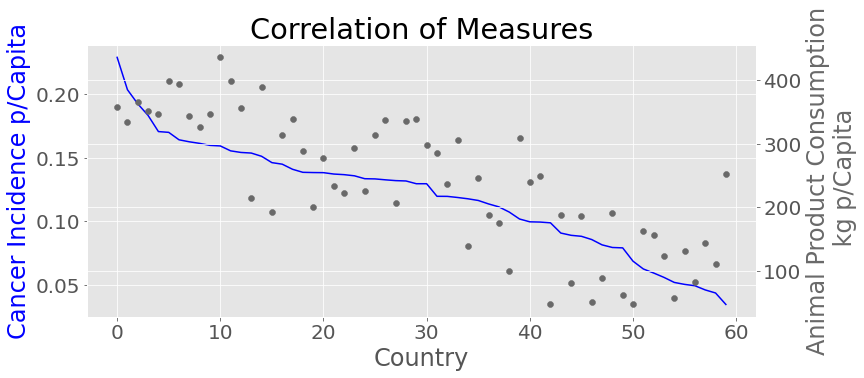

In [26]:
# For the line chart, all, sort by pop size?.
# Twin Axes
plt.rcParams.update({'font.size': 20})
df_ranked = df_combo.sort_values('Incidence Per Age Capita', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,5))

x = np.arange(len(df_ranked['Incidence Per Age Capita']))
y1 = df_ranked['Incidence Per Age Capita']
y2 = df_ranked['animal_product_kg_cap_yr']

ax.set_title('Correlation of Measures')
ax.plot(x, y1, color='b')
ax.set_ylabel('Cancer Incidence p/Capita', color='b')
ax.set_xlabel('Country')

ax2=ax.twinx()
ax2.scatter(x, y2, color='dimgrey')
ax2.set_ylabel('Animal Product Consumption\n kg p/Capita', color='dimgrey')

# dual axis


In [23]:
df_bar = df_combo.sort_values('corr_diff', ascending=False).iloc[:10, :]

df_bar2 = df_combo.sort_values('corr_diff', ascending=True).iloc[:10, :]
df_bar2

,Unnamed: 0,country_name,Alpha3,N20_49,P20_49,TOTAL,Total_Pop,Incidence Per Age Capita,year,animal_product_kg_cap_yr,corr_diff
59,59,Zimbabwe,ZWE,421.8,426933.6,1142.2,873306.0,0.098798,2008,47.34,47.241202
41,41,Philippines,PHL,4568.6,6660518.0,15969.8,14031144.0,0.068592,2008,48.54,48.471408
53,53,Uganda,UGA,836.8,977310.2,1600.2,2242928.8,0.085623,2008,51.83,51.744377
58,58,Viet Nam,VNM,1750.2,3374945.2,5763.2,6028657.4,0.051859,2008,57.07,57.018141
51,51,Thailand,THA,4687.8,5928952.0,20427.2,11604312.2,0.079066,2008,62.09,62.010934
40,40,Peru,PER,2315.0,2602317.0,11854.0,5582951.4,0.088959,2008,81.67,81.581041
23,23,India,IND,11593.4,23535480.8,42447.8,47320280.6,0.049259,2008,82.21,82.160741
34,34,Malaysia,MYS,648.6,796360.0,2793.8,1745800.0,0.081446,2008,89.28,89.198554
11,11,China,CHN,33324.2,31062495.4,195833.6,62966872.8,0.107281,2008,99.99,99.882719
30,30,Kenya,KEN,761.0,1747514.0,1911.6,3134798.0,0.043548,2008,110.24,110.196452


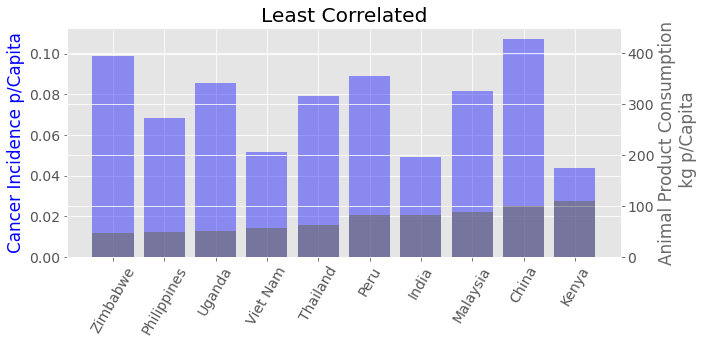

In [42]:
# Where is it the most and least correlated?  This is LEAST correlated
# For the bar chart, let's have only top/bottom
# top10
#df_bar = df_combo.sort_values('corr_diff', ascending=False).iloc[:7, :]  # has biggest corr_diff
#df_bar2 = df_combo.sort_values('corr_diff', ascending=False).iloc[:-7, :]  # has smaller corr_diff

fig, ax  = plt.subplots(figsize=(10,5))

x = np.arange(len(df_bar2['country_name']))
y1 = df_bar2['Incidence Per Age Capita']
y2 = df_bar2['animal_product_kg_cap_yr']


ax.bar(x, y1, alpha = .4, color='b')
ax.set_xticks(x)
ax.set_xticklabels(df_bar2['country_name'], rotation=60, )
ax.set_ylabel('Cancer Incidence p/Capita', color='b')

ax2=ax.twinx()
ax2.bar(x, y2, alpha = .6, color = 'dimgrey')
ax2.set_ylim ([0,450])
ax2.set_ylabel('Animal Product Consumption\n kg p/Capita', color='dimgrey');
title = "Least"
ax.set_title('{} Correlated'.format(title))

fig.tight_layout()


Text(0, 0.5, 'Animal Product Consumption kg p/Capita')

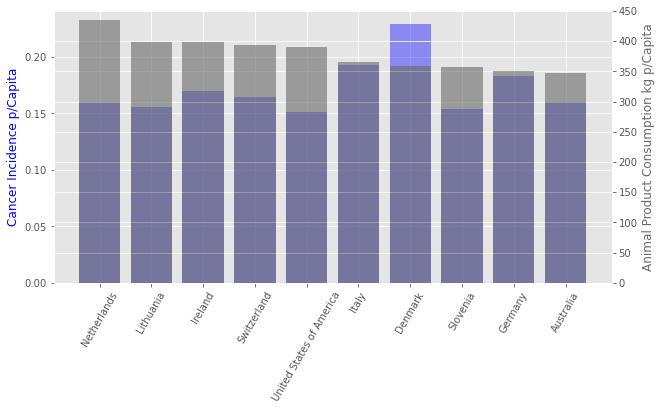

In [25]:
# MOST correlated
# top10
#df_bar = df_combo.sort_values('corr_diff', ascending=False).iloc[:7, :]  # has biggest corr_diff
#df_bar2 = df_combo.sort_values('corr_diff', ascending=False).iloc[:-7, :]  # has smaller corr_diff

fig, ax  = plt.subplots(figsize=(10,5))

x = np.arange(len(df_bar['country_name']))
y1 = df_bar['Incidence Per Age Capita']
y2 = df_bar['animal_product_kg_cap_yr']


ax.bar(x, y1, alpha = .4, color='b')
ax.set_xticks(x)
ax.set_xticklabels(df_bar['country_name'], rotation=60);
ax.set_ylabel('Cancer Incidence p/Capita', color='b')

ax2=ax.twinx()
ax2.bar(x, y2, alpha = .6, color = 'dimgrey')
ax2.set_ylim ([0,450])
ax2.set_ylabel('Animal Product Consumption\n kg p/Capita', color='dimgrey')